In [1]:
import os.path as osp
import pandas as pd
from collections import Counter
import numpy as np
import sys

sys.path.append('../analyzing_annotations')

from analysis_utils import read_ann_df, display_img

pd.options.mode.chained_assignment = None  # default='warn'

IMG_LOCATION=osp.abspath('../generated_items/')

data_dir = osp.abspath('../scenegram_data')
pred_dir = osp.abspath('../predicted_data/processed')
kilogram_dir = osp.abspath('../kilogram')

# Loading Data

In [2]:
twostep_predictions = True
fewshot_predictions = False

pred_input_file = osp.join(pred_dir, f'processed_predictions{"_twostep" if twostep_predictions else ""}{"_fewshot" if fewshot_predictions else ""}.csv')
pred_df = pd.read_csv(pred_input_file, index_col=0)
pred_df = pred_df.set_index(['tangram', 'scene'])

ann_input_file = osp.join(data_dir, 'scenegram.csv')
ann_df = read_ann_df(ann_input_file)
ann_df.head_noun = ann_df.head_noun.apply(lambda x: x.split('/')[0].strip())

models = [c.replace('response_', '') for c in pred_df.columns if c.startswith('response_')]

tangrams, scenes = zip(*pred_df.index)
tangrams = sorted(set(tangrams))
scenes = sorted(set(scenes))


# move baseline to end of the list
scenes.remove('none')
scenes.append('none')

tangram2idx = {t:i for i, t in enumerate(tangrams)}
idx2tangram = {i:t for t, i in tangram2idx.items()}

#display(ann_df.head())

In [3]:
_pred_df = pred_df.reset_index().groupby('item_id').agg({
    'tangram': 'first', 'scene': 'first',
    **{f'label_{model}': list for model in models}
})

In [4]:
def display_examples(selection, pred_df=pred_df, ann_df=ann_df, models=models):

    for _, row_data in selection.iterrows():  
    
        display_img((row_data.tangram, row_data.scene), ann_df, IMG_LOCATION)
        
        responses = {
                model:pred_df.loc[row_data.tangram, row_data.scene][f'label_{model}'].to_list() for model in models
        }
        
        responses_counts = {
            k:Counter(v).most_common() for k,v in responses.items()
        }
        
        for model, responses_with_counts in responses_counts.items():
            print(model, '\n')
            print('; '.join([f'{r} ({c})' for r, c in responses_with_counts]))
            print('\n--------\n')
                
        print('###################')

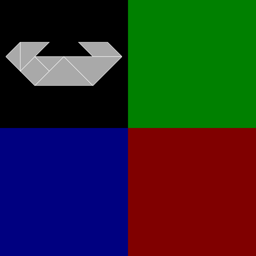

llava-13b 

person (3); horse (2); bird (2); boat (1); shape (1); house (1)

--------

llava-7b 

house (3); square (2); diamond (2); triangle (1); parallelogram (1); box (1)

--------

llava-34b 

boat (5); bird (2); hexagon (2); bow (1)

--------

llava-72b 

house (7); boat (3)

--------

###################


/tmp/ipykernel_34044/35692468.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  model:pred_df.loc[row_data.tangram, row_data.scene][f'label_{model}'].to_list() for model in models


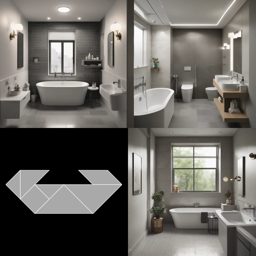

llava-13b 

person (3); a (3); house (2); square (1); tree (1)

--------

llava-7b 

bathtub (6); rectangle (2); bathroom (2)

--------

llava-34b 

boat (5); bird (3); square (1); hexagon (1)

--------

llava-72b 

house (8); boat (1); bathtub (1)

--------

###################


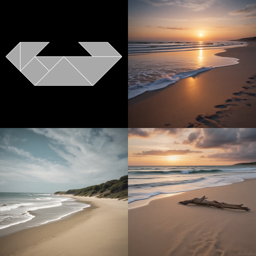

llava-13b 

a (2); square (2); bird (2); house (1); fish (1); boat (1); tree (1)

--------

llava-7b 

sun (3); bird (2); diamond (2); boat (1); wave (1); house (1)

--------

llava-34b 

boat (9); bird (1)

--------

llava-72b 

sailboat (4); house (3); boat (3)

--------

###################


In [5]:
selection = _pred_df.loc[np.logical_and(_pred_df.tangram == 'page5-153', _pred_df.scene.isin(['beach', 'bathroom', 'none']))]
display_examples(selection)

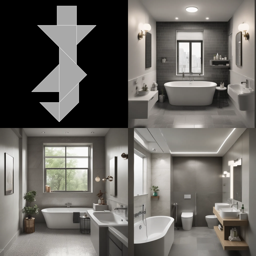

llava-13b 

house (2); tree (2); person (1); snowflake (1); square (1); cat (1); combination (1); bird (1)

--------

llava-7b 

bathtub (3); chair (2); house (2); triangle (2); diamond (1)

--------

llava-34b 

bird (4); man (2); person (1); crane (1); dog (1); house (1)

--------

llava-72b 

house (6); cross (2); cat (1); bird (1)

--------

###################


/tmp/ipykernel_34044/35692468.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  model:pred_df.loc[row_data.tangram, row_data.scene][f'label_{model}'].to_list() for model in models


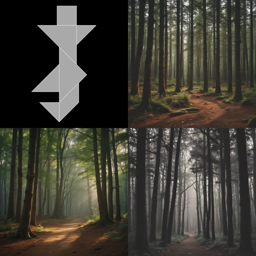

llava-13b 

bird (3); person (2); cat (2); house (2); animal (1)

--------

llava-7b 

diamond (5); house (2); triangle (2); figure (1)

--------

llava-34b 

man (3); bird (2); house (2); tree (2); triangle (1)

--------

llava-72b 

house (6); bird (3); person (1)

--------

###################


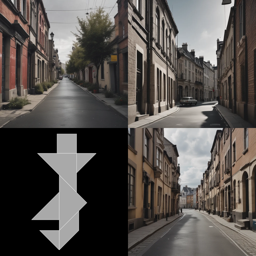

llava-13b 

tree (3); animal (2); person (2); shape (1); bird (1); a (1)

--------

llava-7b 

diamond (3); house (3); shape (1); triangle (1); figure (1); staircase (1)

--------

llava-34b 

bird (5); triangle (2); man (1); house (1); dog (1)

--------

llava-72b 

bird (5); cross (3); house (2)

--------

###################


In [6]:
selection = _pred_df.loc[np.logical_and(_pred_df.tangram == 'page3-85', _pred_df.scene.isin(['bathroom', 'street', 'forest']))]
display_examples(selection)

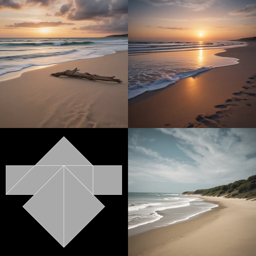

llava-13b 

bird (3); triangle (2); snowflake (1); house (1); square (1); boat (1); tree (1)

--------

llava-7b 

beach (5); sunset (2); triangle (2); sun (1)

--------

llava-34b 

triangle (4); bird (3); house (2); diamond (1)

--------

llava-72b 

house (10)

--------

###################


/tmp/ipykernel_34044/35692468.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  model:pred_df.loc[row_data.tangram, row_data.scene][f'label_{model}'].to_list() for model in models


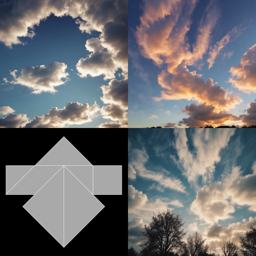

llava-13b 

bird (3); triangle (3); house (2); shape (1); animal (1)

--------

llava-7b 

diamond (5); square (2); cloud (2); triangle (1)

--------

llava-34b 

triangle (7); bird (2); diamond (1)

--------

llava-72b 

house (10)

--------

###################


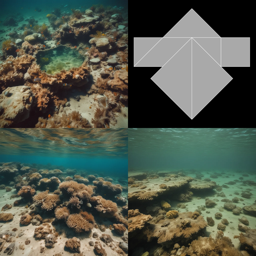

llava-13b 

person (2); house (2); bird (2); cat (1); shape (1); square (1); fish (1)

--------

llava-7b 

diamond (6); square (2); hexagon (2)

--------

llava-34b 

triangle (6); diamond (2); house (2)

--------

llava-72b 

house (10)

--------

###################


In [7]:
selection = _pred_df.loc[np.logical_and(_pred_df.tangram == 'page3-182', _pred_df.scene.isin(['beach', 'sea_bottom', 'sky']))]
display_examples(selection)

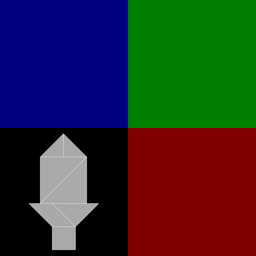

/tmp/ipykernel_34044/35692468.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  model:pred_df.loc[row_data.tangram, row_data.scene][f'label_{model}'].to_list() for model in models


llava-13b 

shape (2); person (2); bird (2); piece (2); combination (1); figure (1)

--------

llava-7b 

pyramid (7); triangle (3)

--------

llava-34b 

triangle (5); pyramid (5)

--------

llava-72b 

house (6); pyramid (4)

--------

###################


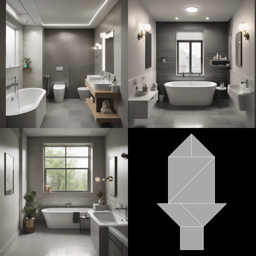

llava-13b 

person (4); bird (2); triangle (1); figure (1); tree (1); shape (1)

--------

llava-7b 

house (5); triangle (3); bathtub (2)

--------

llava-34b 

house (4); pyramid (4); triangle (2)

--------

llava-72b 

house (7); pyramid (3)

--------

###################


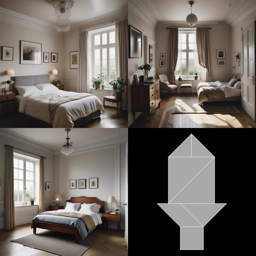

llava-13b 

house (2); triangle (2); bird (2); shape (2); person (1); polygon (1)

--------

llava-7b 

house (6); pyramid (3); diamond (1)

--------

llava-34b 

pyramid (7); house (2); triangle (1)

--------

llava-72b 

house (7); pyramid (2); triangle (1)

--------

###################


In [8]:
selection = _pred_df.loc[np.logical_and(_pred_df.tangram == 'page5-186', _pred_df.scene.isin(['bathroom', 'bedroom', 'none']))]
display_examples(selection)